In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('alamos.txt', skiprows=20, sep='\s+',header=None,names=["DD/MM/AAAA","PRECIP","EVAP","TMAX","TMIN"])
# "Shift + Enter

In [3]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df0['FECHA'] = pd.to_datetime(df0.apply(lambda x: x['DD/MM/AAAA'], 1), dayfirst=True)
df0 = df0.drop(['DD/MM/AAAA'], 1)

In [4]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,PRECIP,EVAP,TMAX,TMIN,FECHA
0,0.0,2.0,22.5,6.0,1961-01-01
1,0.0,1.1,25.0,9.0,1961-01-02
2,0.0,3.4,27.5,9.0,1961-01-03
3,0.0,2.4,27.5,11.0,1961-01-04
4,7.4,6.0,22.0,13.5,1961-01-05


In [5]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [6]:
df.dtypes

PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
FECHA     datetime64[ns]
dtype: object

In [7]:
df0["MES"]=df0["FECHA"].dt.month

In [8]:
df0["AÑO"]=df0["FECHA"].dt.year

In [9]:
df.head()

,PRECIP,EVAP,TMAX,TMIN,FECHA,MES,AÑO
0,0.0,2.0,22.5,6.0,1961-01-01,1,1961
1,0.0,1.1,25.0,9.0,1961-01-02,1,1961
2,0.0,3.4,27.5,9.0,1961-01-03,1,1961
3,0.0,2.4,27.5,11.0,1961-01-04,1,1961
4,7.4,6.0,22.0,13.5,1961-01-05,1,1961


In [10]:
pd.options.display.max_rows=1000

In [20]:
#hacer for loop para que segun el mes nos de la suma 
for i in range(1,13):
    PRECIP_MES= df.loc[df["MES"]==i,"PRECIP"].sum()
    print("MES",i,np.round(PRECIP_MES,decimals=1),"mm")

MES 1 805.8 mm
MES 2 411.7 mm
MES 3 391.7 mm
MES 4 39.4 mm
MES 5 89.0 mm
MES 6 585.9 mm
MES 7 4055.7 mm
MES 8 4558.9 mm
MES 9 1984.5 mm
MES 10 1169.1 mm
MES 11 577.8 mm
MES 12 813.6 mm


In [21]:
PRECIP_MES=(805.8,411.7,391.7,39.4,89.0,585.9,4055.7,4558.9,1984.5,1169.1,577.8,813.6)

In [22]:
ind = np.arange(len(PRECIP_MES))  # the x locations for the groups
width = 0.35  # the width of the bars

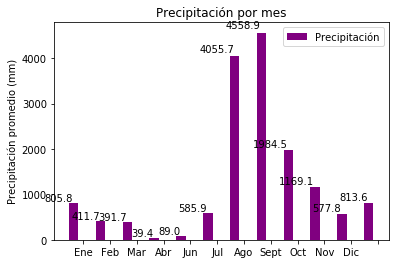

In [23]:
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, PRECIP_MES, width,
                color='Purple', label='Precipitación')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precipitación promedio (mm)')
ax.set_title('Precipitación por mes')
ax.set_xticks(ind)
ax.set_xticklabels(('Ene', 'Feb', 'Mar', 'Abr', 'Jun','Jul','Ago','Sept','Oct','Nov'
                   ,'Dic'))
ax.legend()

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")


plt.show()

In [24]:
#Los meses más lluviosos son agosto y septiembre

In [25]:
pd.options.display.max_rows=1000

In [36]:
#hacer for loop para que segun el mes nos de la suma 
#Temperaturas MAXIMA por mes 
for i in range(1,13):
    PRECIP_MES= df.loc[df["MES"]==i,"TMAX"].max()
    print("MES",i,np.round(PRECIP_MES,decimals=1),"°C")

MES 1 41.5 °C
MES 2 44.0 °C
MES 3 44.0 °C
MES 4 43.0 °C
MES 5 48.0 °C
MES 6 49.5 °C
MES 7 45.5 °C
MES 8 44.0 °C
MES 9 46.0 °C
MES 10 43.0 °C
MES 11 39.0 °C
MES 12 39.0 °C


In [38]:
TEMP_MAX=(41.5,44.0,44.0,43.0,48.0,49.5,45.5,44.0,46.0,43.0,39.0,39.0)

In [39]:
ind = np.arange(len(TEMP_MAX))  # the x locations for the groups
width = 0.35  # the width of the bars

No handles with labels found to put in legend.


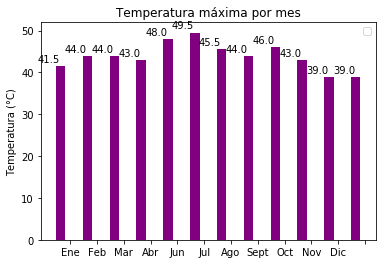

In [109]:
#5_TXx: La máxima mensual de la temperatura máxima, max(Tmax)
#7_TXn: El mínimo mensual de la temperatura máxima, min(Tmax).

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, TEMP_MAX, width,
                color='Purple')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperatura máxima por mes')
ax.set_xticks(ind)
ax.set_xticklabels(('Ene', 'Feb', 'Mar', 'Abr', 'Jun','Jul','Ago','Sept','Oct','Nov'
                   ,'Dic'))
ax.legend()

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")


plt.show()

In [42]:
#hacer for loop para que segun el mes nos de la suma 
#Temperaturas MAXIMA por mes 
for i in range(1,13):
    PRECIP_MES= df.loc[df["MES"]==i,"TMIN"].min()
    print("MES",i,np.round(PRECIP_MES,decimals=1),"mm")

MES 1 0.0 mm
MES 2 -4.0 mm
MES 3 2.0 mm
MES 4 5.0 mm
MES 5 6.5 mm
MES 6 8.0 mm
MES 7 9.0 mm
MES 8 9.5 mm
MES 9 1.3 mm
MES 10 6.5 mm
MES 11 0.4 mm
MES 12 0.0 mm


In [43]:
TEMP_MIN=(0.0,-4.0,2.0,5.0,6.5,8.0,9.0,9.5,1.3,6.5,0.4,0.0)

In [44]:
ind = np.arange(len(TEMP_MIN))  # the x locations for the groups
width = 0.35  # the width of the bars

No handles with labels found to put in legend.


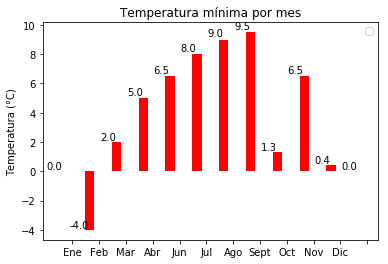

In [90]:
#6_TNx. La máxima mensual de la temperatura mínima, max(Tmin).
#8_TNn: El mínimo mensual de la temperatura mínima, min(Tmin).

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, TEMP_MIN, width,
                color='Red')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperatura mínima por mes')
ax.set_xticks(ind)
ax.set_xticklabels(('Ene', 'Feb', 'Mar', 'Abr', 'Jun','Jul','Ago','Sept','Oct','Nov'
                   ,'Dic'))
ax.legend()

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")


plt.show()

In [48]:
#, label='Precipitación'

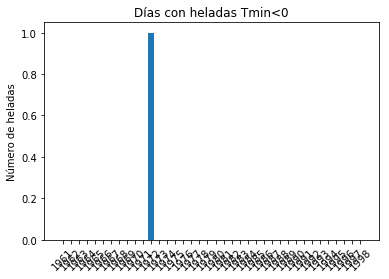

In [79]:
#1_Número de días con heladas por año (FD: Tmin < 0ºC)
data1=[]
data2=[]
for i in range(0, 38):
    init=1961
    count=init + i #for i in range(0, 38)]
    j=df[df.AÑO==(1961+i)].TMIN
    ji=len([1 for i in j if i < 0])
    data1.append(count)
    data2.append(ji)
df3=pd.DataFrame({"AÑO" : data1,"TMIN" : data2})   

x = df3.AÑO
y=np.arange(len(x))
TMIN= df3.TMIN
 
plt.bar(y, TMIN, align='center')
plt.xticks(y, x,rotation=45)
plt.ylabel('Número de heladas')
plt.title("Días con heladas Tmin<0")
plt.show()

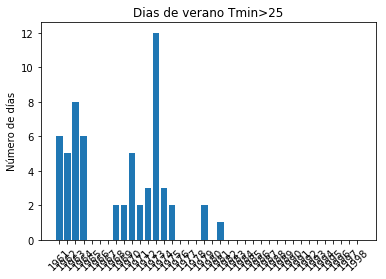

In [80]:
#2_Número de días de verano por año (SU: Tmax > 25ºC)
data1=[]
data2=[]
for i in range(0, 38):
    init=1961
    count=init + i #for i in range(0, 38)]
    j=df[df.AÑO==(1961+i)].TMIN
    ji=len([1 for i in j if i > 25])
    data1.append(count)
    data2.append(ji)
df3=pd.DataFrame({"AÑO" : data1, "DVer" : data2})

x=df3.AÑO
y=np.arange(len(x))
DV=df3.DVer

plt.bar(y, DV, align='center')
plt.xticks(y, x,rotation=45)
plt.ylabel('Número de días')
plt.title("Dias de verano Tmin>25")
plt.show()

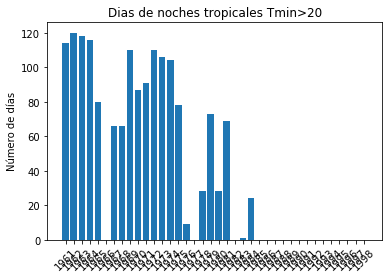

In [82]:
#3_Número de noches tropicales por año (TR: Tmin > 20ºC)
data1=[]
data2=[]
#print("Año","   Número de noches tropicales por año (TR: Tmin > 20ºC)")
for i in range(0, 38):
    init=1961
    count=init + i #for i in range(0, 38)]
    j=df[df.AÑO==(1961+i)].TMIN
    ji=len([1 for i in j if i > 20])
    data1.append(count)
    data2.append(ji)
df3=pd.DataFrame({"AÑO" : data1,"TROP" : data2})

x=df3.AÑO
y=np.arange(len(x))
TP=df3.TROP

plt.bar(y, TP, align='center')
plt.xticks(y, x,rotation=45)
plt.ylabel('Número de días')
plt.title("Dias de noches tropicales Tmin>20")
plt.show()

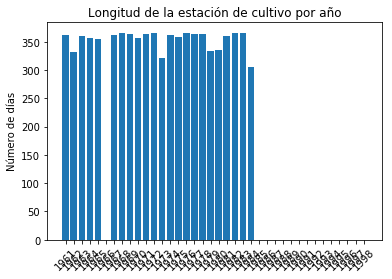

In [83]:
#4_Longitud de la estación de cultivo por año
#print("Año","   Longitud de la estación de cultivo por año")
data1=[]
data2=[]
for i in range(0, 38):
    init=1961
    count=init + i #for i in range(0, 37)]
    j=(df[df.AÑO==(1961+i)].TMIN + df[df.AÑO==(1961+i)].TMIN)/2
    ji=len([1 for i in j if i < 5])
    gi=len([1 for i in j if i > 5])
    ci=ji+gi
    j=g=0
    data1.append(count)
    data2.append(ci)
df3=pd.DataFrame({"AÑO" : data1, "CULT" : data2})

x=df3.AÑO
y=np.arange(len(x))
C=df3.CULT

plt.bar(y, C, align='center')
plt.xticks(y, x,rotation=45)
plt.ylabel('Número de días')
plt.title("Longitud de la estación de cultivo por año")
plt.show()

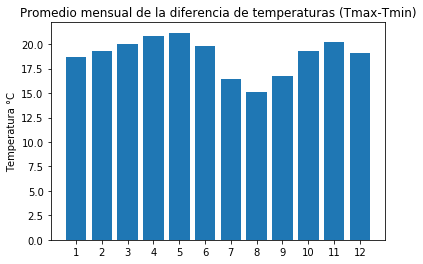

In [111]:
#9_DTR: El promedio mensual de la diferencia de temperaturas (Tmax-Tmin). 
#print("Mes","Promedio mensual de la diferencia de temperaturas (Tmax-Tmin)")
data1=[]
data2=[]
df2=pd.DataFrame({ 'MES' : df.MES, "DIF" : df.TMAX - df.TMIN})
for i in range(0, 12):
    init=1
    count=init + i
    j=df2[df2.MES==(init+i)].DIF.mean()
    data1.append(count)
    data2.append(j)
df3=pd.DataFrame({"MES" : data1, "PMES" : data2})

x=df3.MES
y=np.arange(len(x))
p=df3.PMES

plt.bar(y, p, align='center')
plt.xticks(y, x)
plt.ylabel('Temperatura °C')
plt.title("Promedio mensual de la diferencia de temperaturas (Tmax-Tmin)")
plt.show()

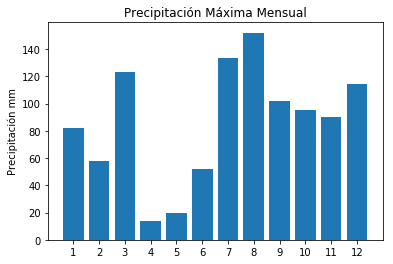

In [85]:
#10_Rx1day: Precipitación diaria máxima mensual en 1 día. 
#print("Mes","Precipitación máxima mensual")
data1=[]
data2=[]
for i in range(0, 12):
    init=1
    count=init + i
    j=df[df.MES==(init+i)].PRECIP.max()
    data1.append(count)
    data2.append(j)
df3=pd.DataFrame({"MES" : data1, "PRECIP" : data2})

x=df3.MES
y=np.arange(len(x))
p=df3.PRECIP

plt.bar(y, p, align='center')
plt.xticks(y, x)
plt.ylabel('Precipitación mm')
plt.title("Precipitación Máxima Mensual")
plt.show()

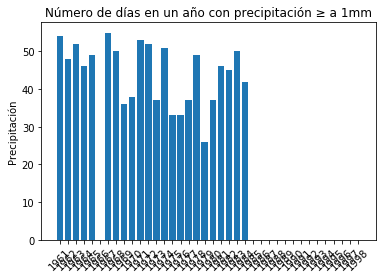

In [86]:
#12_SDII: Número de días en un año con precipitación mayor igual a 1mm
#print("Año","   Número de días en un año con precipitación mayor igual a 1mm")
data1=[]
data2=[]
for i in range(0, 38):
    init=1961
    count=init + i#for i in range(0, 37)]
    j=df[df.AÑO==(1961+i)].PRECIP
    ji=len([1 for i in j if i >= 1])
    data1.append(count)
    data2.append(ji)
df3=pd.DataFrame({"AÑO" : data1, "Precip" : data2})

x=df3.AÑO
y=np.arange(len(x))
p=df3.Precip

plt.bar(y, p, align='center')
plt.xticks(y, x, rotation=45)
plt.ylabel('Precipitación')
plt.title("Número de días en un año con precipitación ≥ a 1mm")
plt.show()

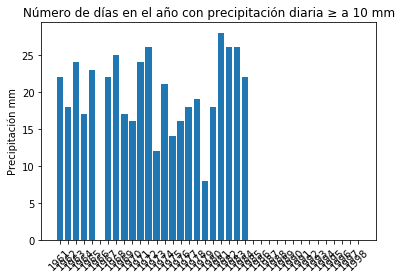

In [87]:
#13_R10mm: Número de días en el año con precipitación diaria mayor igual a 10 mm.  
#print("Año","   Número de días en el año con precipitación diaria mayor igual a 10 mm.")
data1=[]
data2=[]
for i in range(0, 38):
    init=1961
    count=init + i#for i in range(0, 37)]
    j=df[df.AÑO==(1961+i)].PRECIP
    ji=len([1 for i in j if i >= 10])
    data1.append(count)
    data2.append(ji)
df3=pd.DataFrame({"AÑO" : data1, "Num" : data2})
df3

x=df3.AÑO
y=np.arange(len(x))
p=df3.Num

plt.bar(y, p, align='center')
plt.xticks(y, x, rotation=45)
plt.ylabel('Precipitación mm')
plt.title("Número de días en el año con precipitación diaria ≥ a 10 mm")
plt.show()

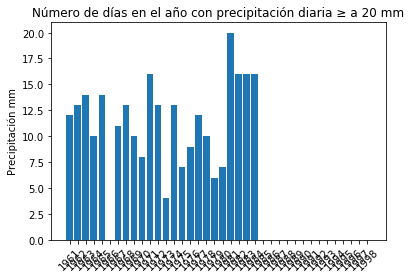

In [88]:
#14_R10mm: Número de días en el año con precipitación diaria mayor igual a 20 mm.  
#print("Año","   Número de días en el año con precipitación diaria mayor igual a 20 mm.")
data1=[]
data2=[]
for i in range(0, 38):
    init=1961
    count=init + i#for i in range(0, 37)]
    j=df[df.AÑO==(1961+i)].PRECIP
    ji=len([1 for i in j if i >= 20])
    data1.append(count)
    data2.append(ji)
df3=pd.DataFrame({"AÑO" : data1, "Num" : data2})
df3

x=df3.AÑO
y=np.arange(len(x))
p=df3.Num

plt.bar(y, p, align='center')
plt.xticks(y, x, rotation=45)
plt.ylabel('Precipitación mm')
plt.title("Número de días en el año con precipitación diaria ≥ a 20 mm")
plt.show()

In [108]:
#10_Rx1day: Precipitación diaria máxima mensual en 1 día. 
#11_Rx5 day: Precipitación diaria máxima mensual en 5 días consecutivos.
#print("Mes","Precipitación máxima mensual")
#data1=[]
#data2=[]
#data3=[]
#for i in range(0, 12):
#    init=1
#    count=init + i
#    j=df[df.MES==(init+i)].PRECIP.max()
#    for k in range(0,5):
#    init2=1
#    count2=init2+k
#    l=df[df.DIA==(init2+k)].PRECIP.max()
#    data1.append(count)
#    data2.append(j)
#    data3.append(l)
#df3=pd.DataFrame({"MES" : data1, "PRECIP" : data2})

#x=df3.MES
#y=np.arange(len(x))
#p=df3.PRECIP

#plt.bar(y, p, align='center')
#plt.xticks(y, x)
#plt.ylabel('Precipitación mm')
#plt.title("Precipitación Máxima Mensual")
#plt.show()